In [1]:
import numpy as np
import math, random
import matplotlib.pyplot as plt
import pandas as pd
import json
import seaborn as sns
from scipy.sparse import load_npz
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
from GimmePandas import ReadToPandas

In [2]:
correct_files = []
for i in range (1,56):
    if i<10:
        a = "../Data/TenExSpectra_JSON/00"+str(i)+".json"
    elif i==18 or i==40 or i==43:
        continue
    else:
        a = "../Data/TenExSpectra_JSON/0"+str(i)+".json"
    correct_files.append(a)
print(correct_files)
print(len(correct_files))

['../Data/TenExSpectra_JSON/001.json', '../Data/TenExSpectra_JSON/002.json', '../Data/TenExSpectra_JSON/003.json', '../Data/TenExSpectra_JSON/004.json', '../Data/TenExSpectra_JSON/005.json', '../Data/TenExSpectra_JSON/006.json', '../Data/TenExSpectra_JSON/007.json', '../Data/TenExSpectra_JSON/008.json', '../Data/TenExSpectra_JSON/009.json', '../Data/TenExSpectra_JSON/010.json', '../Data/TenExSpectra_JSON/011.json', '../Data/TenExSpectra_JSON/012.json', '../Data/TenExSpectra_JSON/013.json', '../Data/TenExSpectra_JSON/014.json', '../Data/TenExSpectra_JSON/015.json', '../Data/TenExSpectra_JSON/016.json', '../Data/TenExSpectra_JSON/017.json', '../Data/TenExSpectra_JSON/019.json', '../Data/TenExSpectra_JSON/020.json', '../Data/TenExSpectra_JSON/021.json', '../Data/TenExSpectra_JSON/022.json', '../Data/TenExSpectra_JSON/023.json', '../Data/TenExSpectra_JSON/024.json', '../Data/TenExSpectra_JSON/025.json', '../Data/TenExSpectra_JSON/026.json', '../Data/TenExSpectra_JSON/027.json', '../Data/Te

In [149]:
data = ReadToPandas(correct_files)

origdata = data
df = data.sample(frac=1).reset_index(drop=True) #suffle the data

Dataframe loaded


In [150]:
df

,Excitation,Baseline,Peak,FWHM points,Xdata,Reflectivity
0,220,98.4472,622.334,"[534.4311231044703, 710.237529754083]","[180.846649169922, 181.7938742229098, 182.7410...","[98.95517867958813, 98.0398024839144, 98.50237..."
1,325,99.104,461.797,"[372.659962149271, 550.9335118594895]","[180.846649169922, 181.7938742229098, 182.7410...","[97.2836740408849, 98.01468588523252, 97.62803..."
2,375,98.1421,479.662,"[453.33438496117355, 505.98901989668116]","[180.846649169922, 181.7938742229098, 182.7410...","[95.19665854507485, 97.48515543136568, 94.4522..."
3,325,98.4185,580.566,"[500.0, 661.1321406888015]","[180.846649169922, 181.7938742229098, 182.7410...","[93.8112952316537, 91.05367793240556, 93.96019..."
4,300,99.663,584.501,"[496.5864065153405, 672.4152767464103]","[180.846649169922, 181.7938742229098, 182.7410...","[93.21955719557194, 90.97744360902254, 86.1898..."
...,...,...,...,...,...,...
518,280,98.7354,628.693,"[475.9006570763911, 781.4855919699618]","[180.846649169922, 181.7938742229098, 182.7410...","[91.60173160173159, 91.3132976533553, 87.02451..."
519,325,99.6347,614.119,"[535.137121378837, 693.1010261853597]","[180.846649169922, 181.7938742229098, 182.7410...","[96.73096446700508, 98.29522663457682, 97.2928..."
520,200,99.3812,565,"[500, 630]","[180.846649169922, 181.7938742229098, 182.7410...","[99.91359447004609, 99.1469455145845, 98.12382..."
521,300,105.864,666.021,"[442.61540570644536, 889.4275935877524]","[180.846649169922, 181.7938742229098, 182.7410...","[91.98633736205991, 93.04600740349022, 91.3741..."


In [151]:
x_sufl = df["Reflectivity"]
y_sufl = df["Baseline"]

In [152]:
x_sufl_arr = pd.DataFrame(x_sufl.to_list())

In [153]:
x_sufl_train = x_sufl_arr.head(419)
x_sufl_test = x_sufl_arr.tail(104)
y_sufl_train = y_sufl.head(419)
y_sufl_test = y_sufl.tail(104)


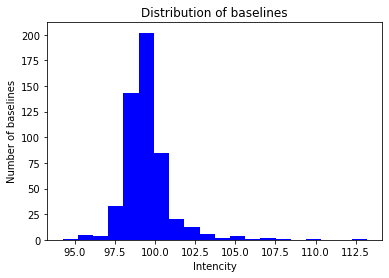

Mean value of baselines in dataset: 99.51 eV


In [154]:
#Visualize data with histograms (whole data and then train and test to see that they represent well)
plt.hist(y_sufl, bins=20, density=False, facecolor='blue')
plt.xlabel("Intencity")
plt.ylabel("Number of baselines")
plt.title("Distribution of baselines")
plt.show()

## mean value of distribution
print("Mean value of baselines in dataset: %0.2f eV" %np.mean(y_sufl))

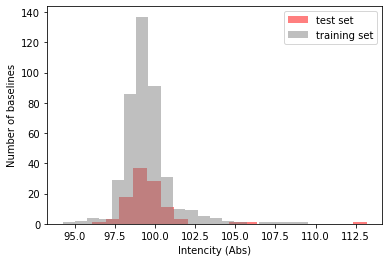

Mean value of baselines in training set: 99.50 eV
Mean value of baselines in test set: 99.57 eV


In [155]:
plt.hist(y_sufl_test, bins=20, density=False, alpha=0.5, facecolor='red', label='test set')
plt.hist(y_sufl_train, bins=20, density=False, alpha=0.5, facecolor='gray', label='training set')
plt.xlabel("Intencity (Abs)")
plt.ylabel("Number of baselines")
plt.legend()
plt.show()

## mean value of distributions
print("Mean value of baselines in training set: %0.2f eV" %np.mean(y_sufl_train))
print("Mean value of baselines in test set: %0.2f eV" %np.mean(y_sufl_test))

In [156]:
# set up grids for alpha and gamma hyperparameters. 
# first value: lower bound; second value: upper bound; 
# third value: number of points to evaluate (here set to '3' --> '-2', '-1' and '0' are evaluated)
# --> make sure to change third value as well when changing the bounds!
alpha = np.logspace(-11, -7, 5)
gamma = np.logspace(-15, -11, 5)

cv_number = 9 ## choose into how many parts training set is divided for cross-validation
kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

## define settings for grid search routine in scikit-learn with above defined grids as input

grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                           cv = cv_number, 
                           scoring = scoring_function,
                           verbose=1000)  ## produces detailed output statements of grid search 
                                          # routine so we can see what is computed
    
# call the fit function in scikit-learn which fits the Coulomb matrices in the training set 
# to their corresponding HOMO energies.
grid_search.fit(x_sufl_train, y_sufl_train)

Fitting 9 folds for each of 25 candidates, totalling 225 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] alpha=1e-11, gamma=1e-15, kernel=rbf ............................
[CV]  alpha=1e-11, gamma=1e-15, kernel=rbf, score=-0.537, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] alpha=1e-11, gamma=1e-15, kernel=rbf ............................
[CV]  alpha=1e-11, gamma=1e-15, kernel=rbf, score=-0.806, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] alpha=1e-11, gamma=1e-15, kernel=rbf ............................
[CV]  alpha=1e-11, gamma=1e-15, kernel=rbf, score=-0.434, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] alpha=1e-11, gamma=1e-15, kernel=rbf ............................
[CV]  alpha=1e-11, gamma=1e-15, kernel=rbf, score=-0.710, total=   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | e

[CV]  alpha=1e-11, gamma=1e-11, kernel=rbf, score=-1.707, total=   0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.7s remaining:    0.0s
[CV] alpha=1e-11, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-11, gamma=1e-11, kernel=rbf, score=-1.530, total=   0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s remaining:    0.0s
[CV] alpha=1e-11, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-11, gamma=1e-11, kernel=rbf, score=-1.663, total=   0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.7s remaining:    0.0s
[CV] alpha=1e-11, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-11, gamma=1e-11, kernel=rbf, score=-1.838, total=   0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.7s remaining:    0.0s
[CV] alpha=1e-11, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-11, gamma=1e-11, kernel=rbf, score=-1.544, total=   0.0s
[Parallel(n_jobs=1)]: Done  44 out o

[CV]  alpha=1e-10, gamma=1e-11, kernel=rbf, score=-1.059, total=   0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    1.5s remaining:    0.0s
[CV] alpha=1e-10, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-10, gamma=1e-11, kernel=rbf, score=-1.505, total=   0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    1.5s remaining:    0.0s
[CV] alpha=1e-10, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-10, gamma=1e-11, kernel=rbf, score=-1.251, total=   0.0s
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    1.5s remaining:    0.0s
[CV] alpha=1e-10, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-10, gamma=1e-11, kernel=rbf, score=-1.394, total=   0.0s
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    1.5s remaining:    0.0s
[CV] alpha=1e-10, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-10, gamma=1e-11, kernel=rbf, score=-1.582, total=   0.0s
[Parallel(n_jobs=1)]: Done  88 out o

[CV]  alpha=1e-09, gamma=1e-11, kernel=rbf, score=-0.987, total=   0.0s
[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed:    2.2s remaining:    0.0s
[CV] alpha=1e-09, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-09, gamma=1e-11, kernel=rbf, score=-0.686, total=   0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    2.3s remaining:    0.0s
[CV] alpha=1e-09, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-09, gamma=1e-11, kernel=rbf, score=-1.025, total=   0.0s
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    2.3s remaining:    0.0s
[CV] alpha=1e-09, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-09, gamma=1e-11, kernel=rbf, score=-0.770, total=   0.0s
[Parallel(n_jobs=1)]: Done 131 out of 131 | elapsed:    2.3s remaining:    0.0s
[CV] alpha=1e-09, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-09, gamma=1e-11, kernel=rbf, score=-0.863, total=   0.0s
[Parallel(n_jobs=1)]: Done 132 out o

[CV]  alpha=1e-08, gamma=1e-11, kernel=rbf, score=-0.846, total=   0.0s
[Parallel(n_jobs=1)]: Done 173 out of 173 | elapsed:    3.1s remaining:    0.0s
[CV] alpha=1e-08, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-08, gamma=1e-11, kernel=rbf, score=-0.477, total=   0.0s
[Parallel(n_jobs=1)]: Done 174 out of 174 | elapsed:    3.1s remaining:    0.0s
[CV] alpha=1e-08, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-08, gamma=1e-11, kernel=rbf, score=-0.709, total=   0.0s
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    3.1s remaining:    0.0s
[CV] alpha=1e-08, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-08, gamma=1e-11, kernel=rbf, score=-0.559, total=   0.0s
[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:    3.1s remaining:    0.0s
[CV] alpha=1e-08, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-08, gamma=1e-11, kernel=rbf, score=-0.532, total=   0.0s
[Parallel(n_jobs=1)]: Done 177 out o

[CV]  alpha=1e-07, gamma=1e-11, kernel=rbf, score=-0.434, total=   0.0s
[Parallel(n_jobs=1)]: Done 219 out of 219 | elapsed:    3.9s remaining:    0.0s
[CV] alpha=1e-07, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-07, gamma=1e-11, kernel=rbf, score=-0.710, total=   0.0s
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    3.9s remaining:    0.0s
[CV] alpha=1e-07, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-07, gamma=1e-11, kernel=rbf, score=-0.540, total=   0.0s
[Parallel(n_jobs=1)]: Done 221 out of 221 | elapsed:    3.9s remaining:    0.0s
[CV] alpha=1e-07, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-07, gamma=1e-11, kernel=rbf, score=-0.507, total=   0.0s
[Parallel(n_jobs=1)]: Done 222 out of 222 | elapsed:    3.9s remaining:    0.0s
[CV] alpha=1e-07, gamma=1e-11, kernel=rbf ............................
[CV]  alpha=1e-07, gamma=1e-11, kernel=rbf, score=-0.563, total=   0.0s
[Parallel(n_jobs=1)]: Done 223 out o

GridSearchCV(cv=9, estimator=KernelRidge(),
             param_grid=[{'alpha': array([1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07]),
                          'gamma': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11]),
                          'kernel': ['rbf']}],
             scoring='neg_mean_absolute_error', verbose=1000)

In [157]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(-means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.594 (+/-0.252) for {'alpha': 1e-11, 'gamma': 1e-15, 'kernel': 'rbf'}
0.626 (+/-0.241) for {'alpha': 1e-11, 'gamma': 1e-14, 'kernel': 'rbf'}
0.866 (+/-0.263) for {'alpha': 1e-11, 'gamma': 1e-13, 'kernel': 'rbf'}
1.308 (+/-0.320) for {'alpha': 1e-11, 'gamma': 1e-12, 'kernel': 'rbf'}
1.539 (+/-0.353) for {'alpha': 1e-11, 'gamma': 1e-11, 'kernel': 'rbf'}
0.624 (+/-0.266) for {'alpha': 1e-10, 'gamma': 1e-15, 'kernel': 'rbf'}
0.594 (+/-0.251) for {'alpha': 1e-10, 'gamma': 1e-14, 'kernel': 'rbf'}
0.626 (+/-0.241) for {'alpha': 1e-10, 'gamma': 1e-13, 'kernel': 'rbf'}
0.866 (+/-0.263) for {'alpha': 1e-10, 'gamma': 1e-12, 'kernel': 'rbf'}
1.308 (+/-0.320) for {'alpha': 1e-10, 'gamma': 1e-11, 'kernel': 'rbf'}
0.768 (+/-0.306) for {'alpha': 1e-09, 'gamma': 1e-15, 'kernel': 'rbf'}
0.624 (+/-0.266) for {'alpha': 1e-09, 'gamma': 1e-14, 'kernel': 'rbf'}
0.594 (+/-0.251) for {'alpha': 1e-09, 'gamma': 1e-13, 'kernel': 'rbf'}
0.626 (+/-0.241) for {'alpha': 1e-09, 'gamma': 1e-12, 'kernel': 'rbf'}
0.866 

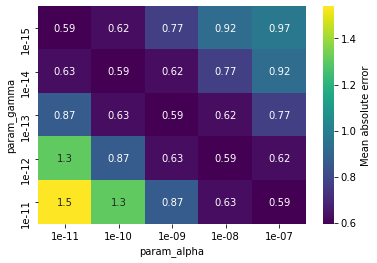

The best combinations of parameters are {'alpha': 1e-09, 'gamma': 1e-13, 'kernel': 'rbf'} with a score of 0.594 on the validation set.


In [158]:
results = pd.DataFrame(grid_search.cv_results_)
#pd.DataFrame(grid_search.cv_results_)

pvt = pd.pivot_table(results, values='mean_test_score', 
                     index='param_gamma', columns='param_alpha')
heatmap = sns.heatmap(-pvt, annot=True, cmap='viridis', cbar_kws={'label': "Mean absolute error"})
figure = heatmap.get_figure()
plt.show()


print("The best combinations of parameters are %s with a score of %0.3f on the validation set."
      % (grid_search.best_params_, -grid_search.best_score_))

Mean absolute error on test set: 0.489


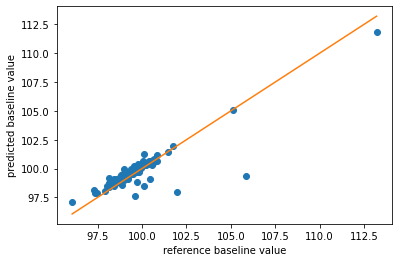

R^2 score on test set: 0.755


In [159]:
# predicted HOMO energies for all test molecules

y_pred = grid_search.predict(x_sufl_test) # scikit-learn automatically takes the best combination
                                     # of hyperparameters from grid search

print("Mean absolute error on test set: %0.3f" %(np.abs(y_pred-y_sufl_test)).mean())

# do the regression plot
plt.plot(y_sufl_test, y_pred, 'o')
plt.plot([np.min(y_sufl_test),np.max(y_sufl_test)], [np.min(y_sufl_test),np.max(y_sufl_test)], '-')
plt.xlabel('reference baseline value')
plt.ylabel('predicted baseline value')
plt.show()
print("R^2 score on test set: %.3f" % r2_score(y_sufl_test, y_pred))

In [ ]:
#Best results: kernel= rbf, alpha = 1e-08, gamma = 1e-12, cv_number = 9 --> MAE=0.623, R2=0.313
#kernel=laplacian, alpha = 1e-07, gamma=1e-11, cv=9 --> MAE0.655, R2=0.285

#suffling data: kernel=rbf, alpha =1e-10, gamma=1e-14, cv_num = 9 --> MAE= 0.466 (0.591 in validation), R2=0.480
# kernel=rbf, alpha =1e-10, gamma=1e-14, cv_num = 9 --> MAE= 0.644 (0.503 in validation), R2=0.106
#kernel=rbf, alpha =1e-11, gamma=1e-15, cv_num = 9 --> MAE= 0.523 (0.577 in validation), R2=0.548
#kernel=rbf, alpha =1e-09, gamma=1e-13, cv_num = 9 --> MAE= 0.489 (0.594 in validation), R2=0.755